# **Task 7**

## **Stock Market Prediction using Numerical and Textual Analysis**


* Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.
* Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

* Download historical stock prices from finance.yahoo.com
* Download textual (news) data from https://bit.ly/36fFPI6


### GRIP THE SPARKS FOUNDATION ###
# Author: Muhammet Varlı

# **Analysis of Stock Market Prices and Stock Price Prediction by RNN and LSTM**

### **Some information about financial data**

* The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions.
* It is often used when examining historical returns or doing a detailed analysis of past performance.
* Stock values are stated in terms of the closing price and the adjusted closing price.
* The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.
* The adjusted closing price factors in anything that might affect the stock price after the market closes.

* The high is the highest price at which a stock traded during a period. 
* The low is the lowest price of the period. 

* Volume is the total number of shares traded in a security over a period. Every time buyers and sellers exchange shares, the amount gets added to the period’s total volume. Studying volume patterns are an essential aspect of technical analysis because it can show the significance of a stock’s price movement.

* A price change that occurs in high volume can carry more weight because it indicates that many traders were behind the move. Conversely, a lower volume price move can be perceived as less important.

## The changes in price of the stock overtime.

* Here we will analyze the changes in the stocks of various technology companies with simple visualization methods.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'FB']

* Take the datas for 2 years

In [4]:
# Set up End and Start times for data grab (We will analyze for 2 years)
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [5]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [6]:
company_list = [AAPL, GOOG, TSLA, FB]
company_name = ["APPLE", "GOOGLE", "TESLA", "FACEBOOK"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2018-11-20,45.367500,43.877499,44.592499,44.244999,271300800.0,42.865883,APPLE
2018-11-21,45.067501,44.137501,44.932499,44.195000,124496800.0,42.817429,APPLE
2018-11-23,44.150002,43.025002,43.735001,43.072498,94496000.0,41.729916,APPLE
2018-11-26,43.737499,42.564999,43.560001,43.654999,179994000.0,42.294266,APPLE
2018-11-27,43.692501,42.720001,42.877499,43.560001,165549600.0,42.202229,APPLE


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-11-13,277.760010,273.100006,277.720001,276.950012,10391200.0,276.950012,FACEBOOK
2020-11-16,279.410004,274.630005,275.049988,278.959991,12970400.0,278.959991,FACEBOOK
2020-11-17,277.679993,273.290009,277.679993,275.000000,15040300.0,275.000000,FACEBOOK
2020-11-18,277.390015,271.839996,274.519989,271.970001,12152900.0,271.970001,FACEBOOK
2020-11-19,273.470001,269.190002,271.019989,272.940002,12934200.0,272.940002,FACEBOOK


## **Adj Close**

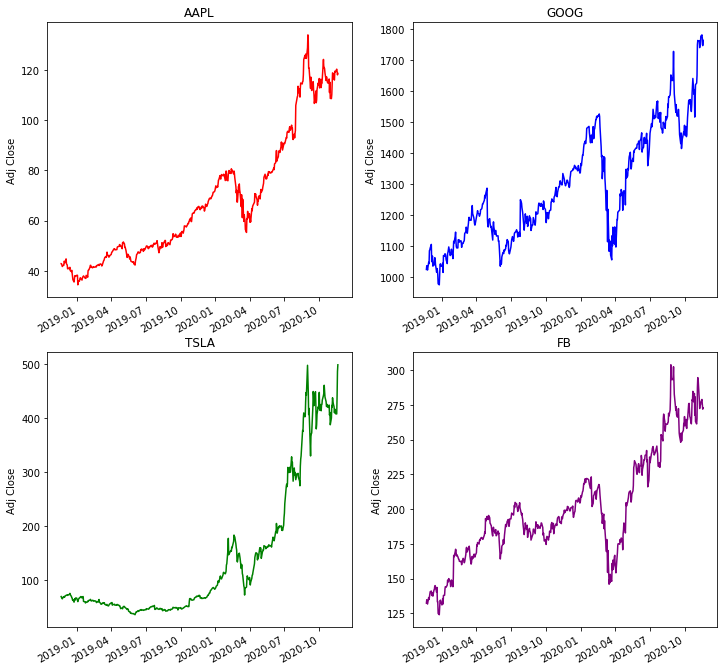

In [9]:
# Let's see a historical view of the closing price of companies

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Red','Blue','Green','Purple']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colorlist[i-1])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## **Volume**

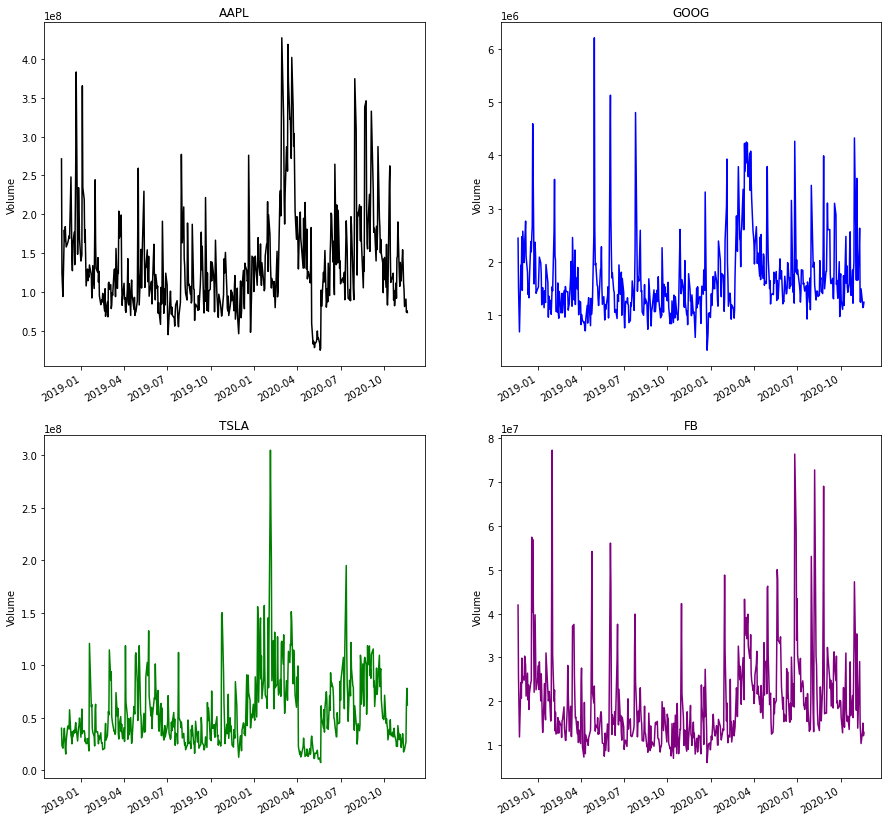

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Black','Blue','Green','Purple']
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colorlist[i-1])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

# The moving average of the various stocks

In [11]:
# Set the Moving Average Day
ma_day = [10, 20, 50]

In [12]:
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [13]:
print(AAPL.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

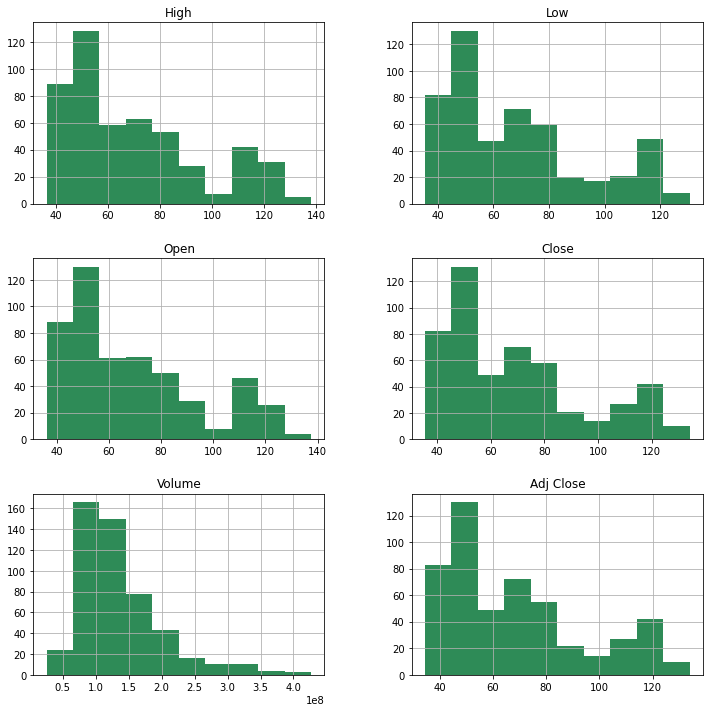

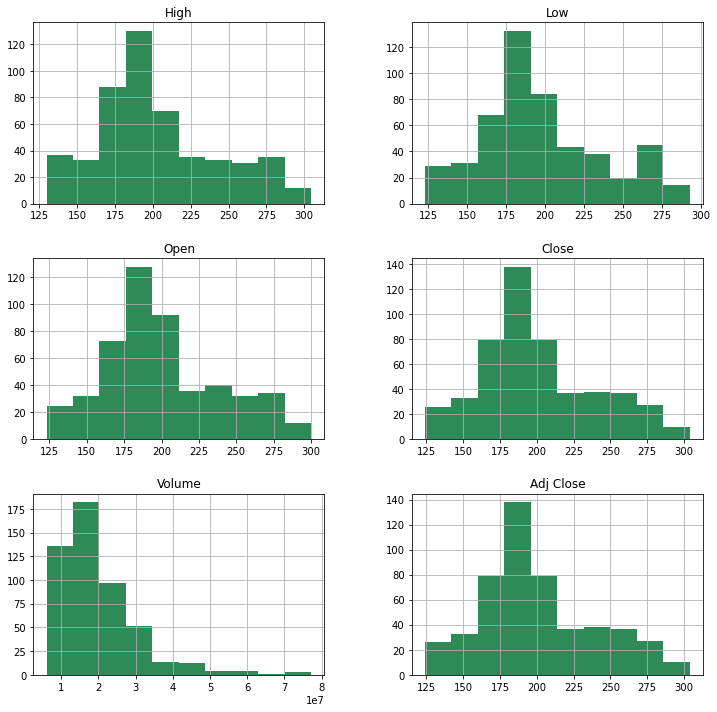

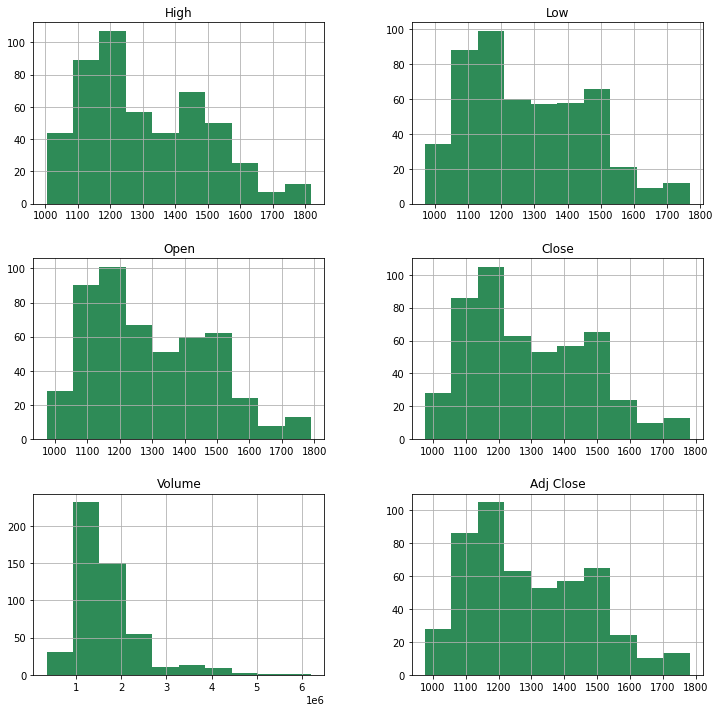

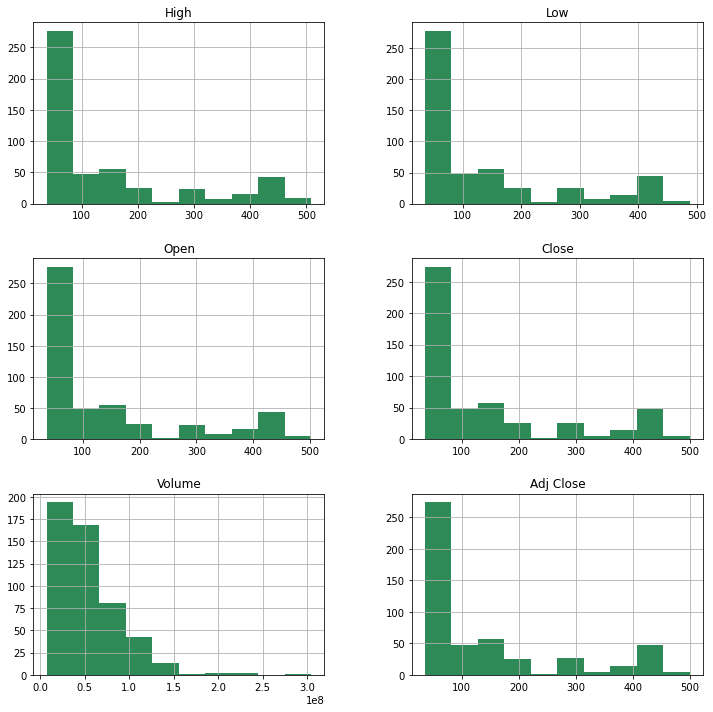

In [14]:
df.groupby("company_name").hist(figsize=(12, 12),color='seagreen');

### Visualization of companies changes over various MA days and 'Adj Close'

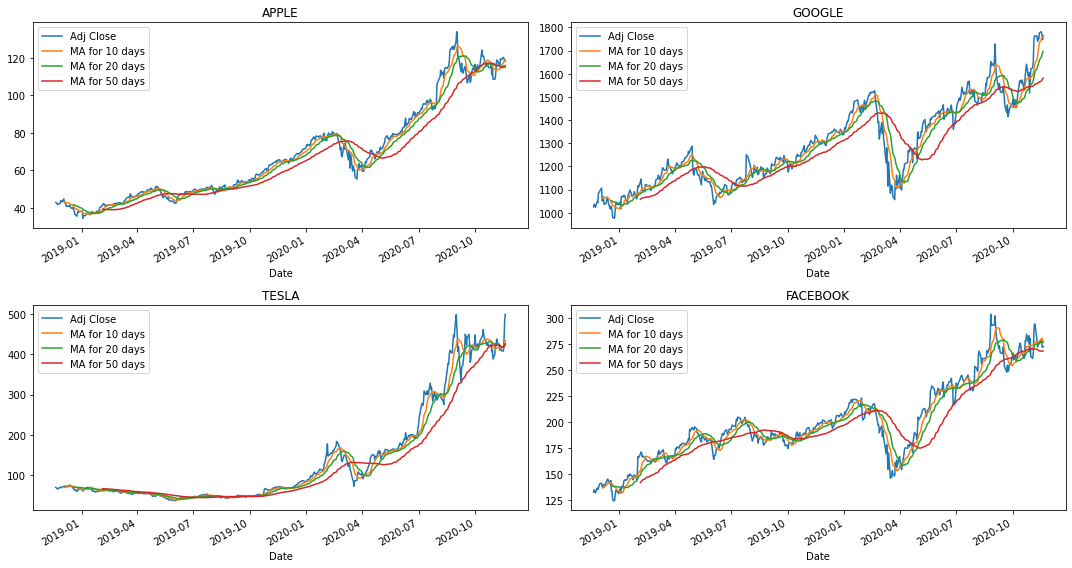

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('FACEBOOK')

fig.tight_layout()

# The daily return of the stock on average.

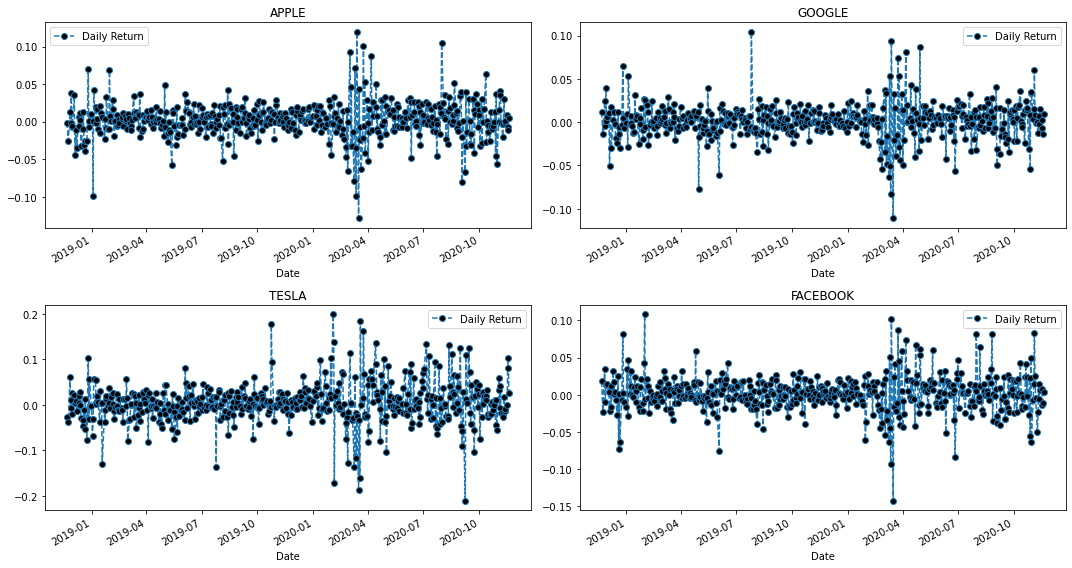

In [16]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[1,0].set_title('TESLA')

FB['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[1,1].set_title('FACEBOOK')

fig.tight_layout()

APPLE Skewness: -0.153943
APPLE Kurtosis: 5.438132
GOOGLE Skewness: -0.046853
GOOGLE Kurtosis: 5.643213
TESLA Skewness: 0.016152
TESLA Kurtosis: 4.066845
FACEBOOK Skewness: -0.089445
FACEBOOK Kurtosis: 4.860928


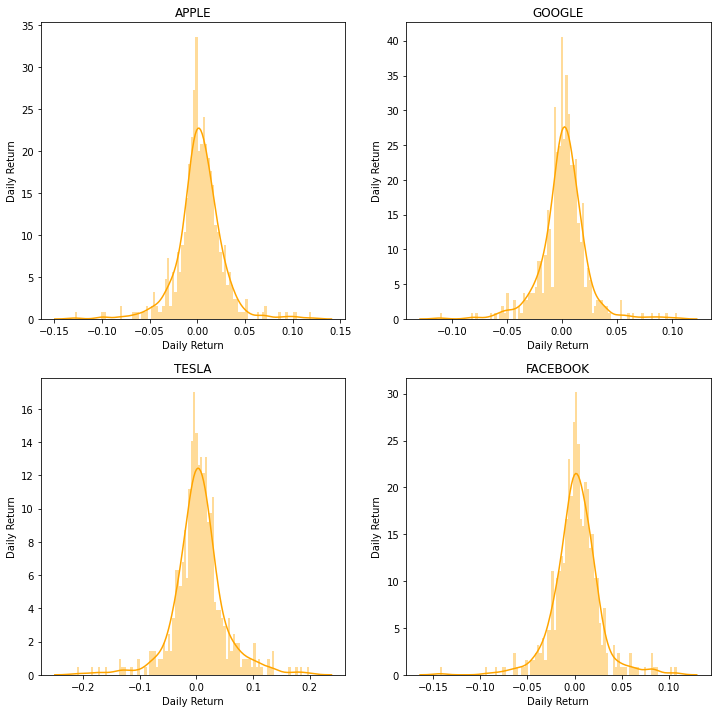

In [17]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='orange')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    # Skewness and Kurtosis
    print(f'{company_name[i - 1]}'+" Skewness: %f" % company['Daily Return'].skew())
    print(f'{company_name[i - 1]}'+" Kurtosis: %f" % company['Daily Return'].kurt())
# Could have also done:
#AAPL['Daily Return'].hist()


# The correlation between different stocks Adj Close prices.

To build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,TSLA,FB
Date,,,,
2018-11-20,42.865883,1025.760010,69.498001,132.429993
2018-11-21,42.817429,1037.609985,67.638000,134.820007
2018-11-23,41.729916,1023.880005,65.166000,131.729996
2018-11-26,42.294266,1048.619995,69.199997,136.380005
2018-11-27,42.202229,1044.410034,68.783997,135.000000


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [19]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,TSLA,FB
Date,,,,
2018-11-20,NaN,NaN,NaN,NaN
2018-11-21,-0.001130,0.011552,-0.026763,0.018047
2018-11-23,-0.025399,-0.013232,-0.036548,-0.022920
2018-11-26,0.013524,0.024163,0.061903,0.035300
2018-11-27,-0.002176,-0.004015,-0.006012,-0.010119


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

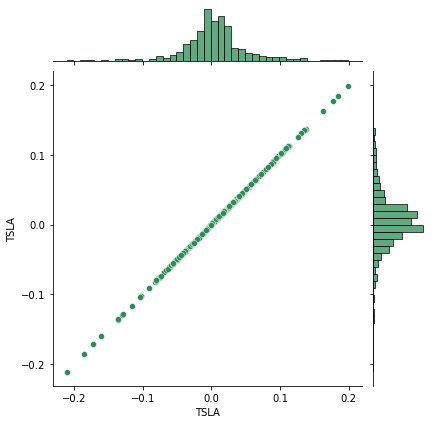

In [20]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('TSLA', 'TSLA', tech_rets, kind='scatter', color='seagreen')

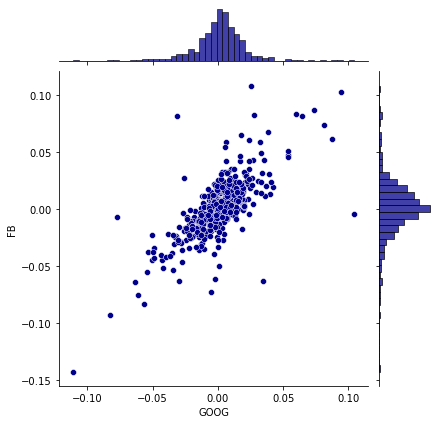

In [21]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'FB', tech_rets, kind='scatter',color='darkblue')

If two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.  We will use sns.pairplot() to automatically create this plot.

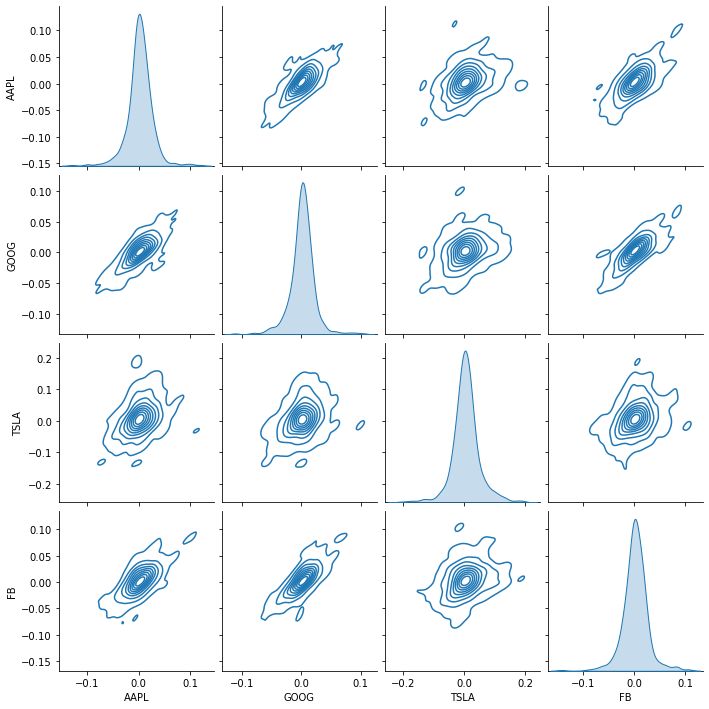

In [22]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='kde')

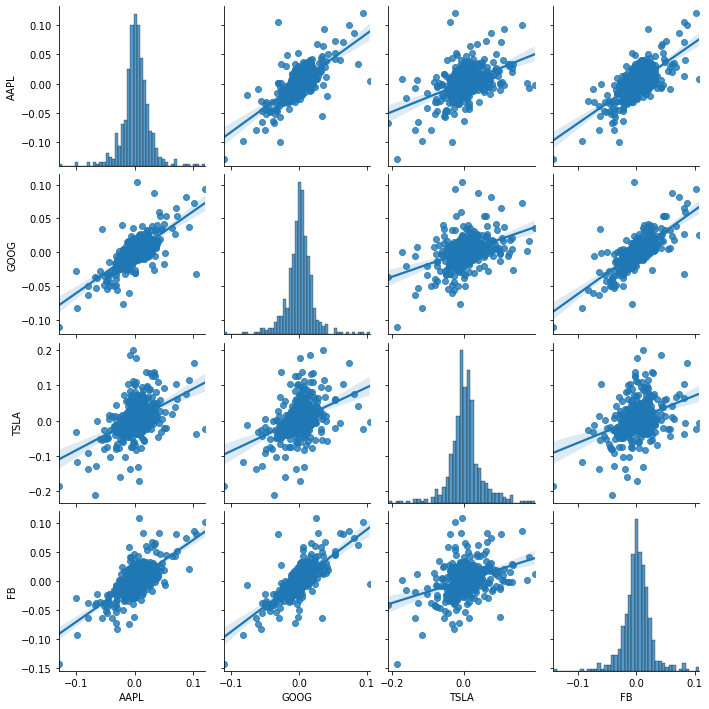

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships between all stocks regarding daily returns. For example, there does not seem to be a very high correlation relationship between Google and Tesla.

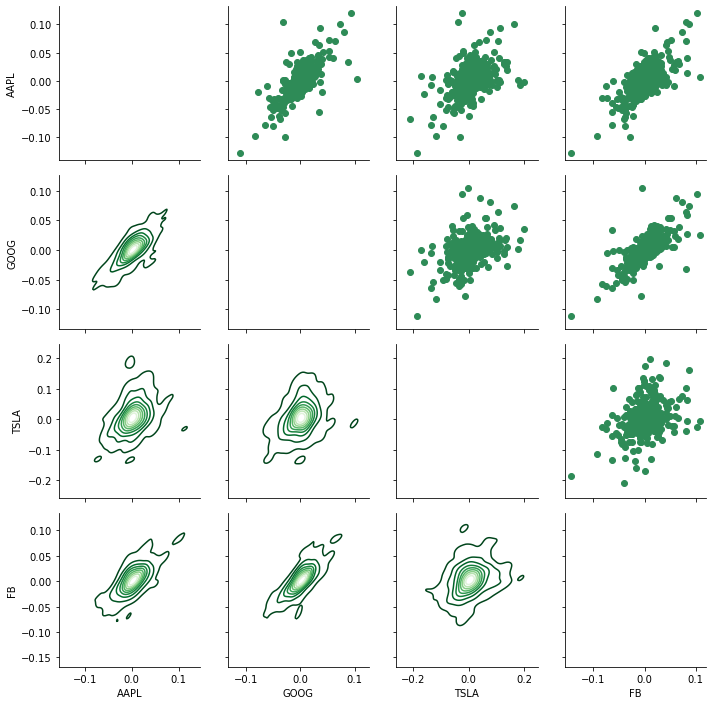

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='seagreen')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='Greens_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

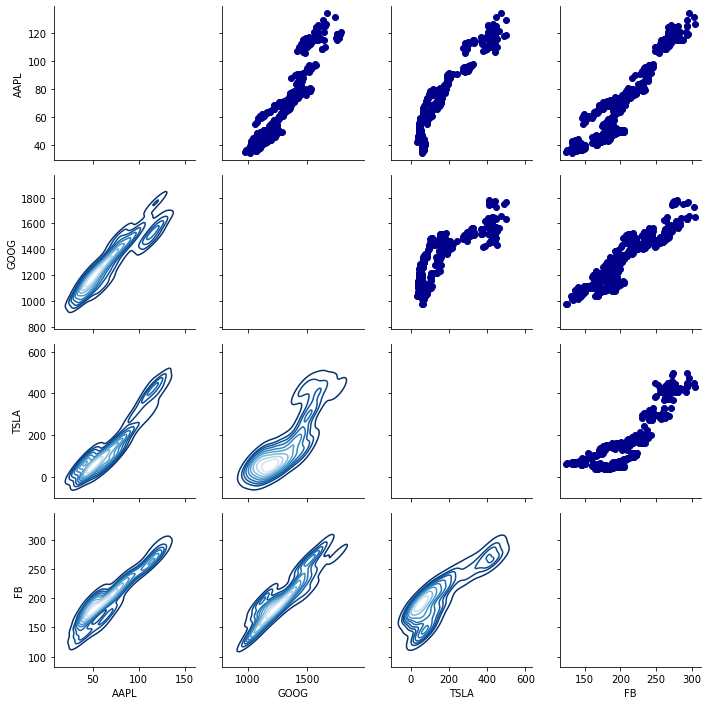

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='darkblue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='Blues_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Correlation

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

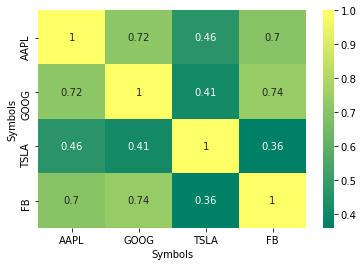

In [28]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

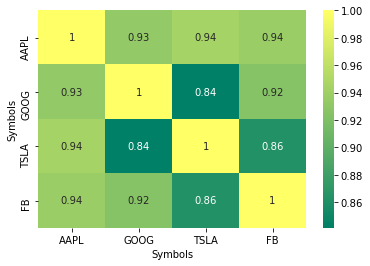

In [29]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Just as we suspected with our PairPlot, we see here that numerically and visually, Google and Tesla's daily stock return do not have very strong correlations compared to others. The strongest correlation is seen between Apple and Tesla. It's also interesting to see all tech companies positively associated.

# Risk Analysis

One of the most basic ways to measure risk is to compare the expected return with the standard deviation of daily returns.

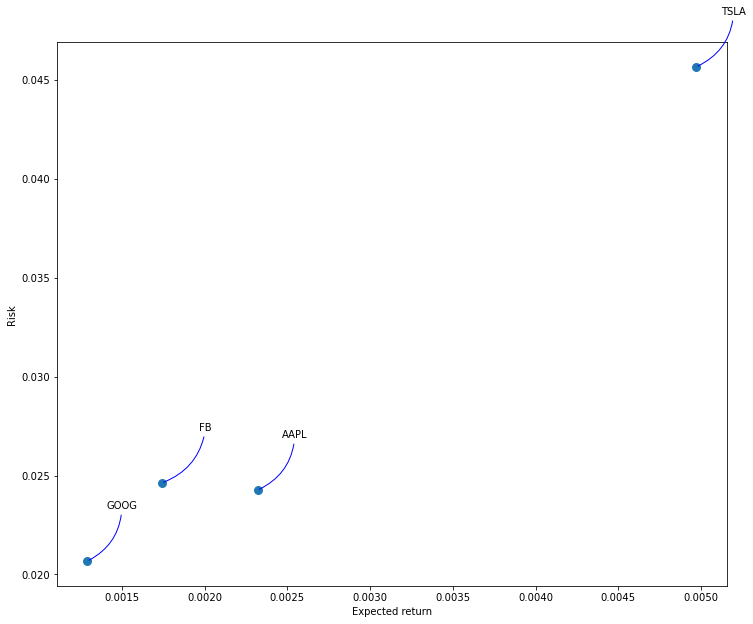

In [30]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

* **Selecting a company and concentrating on analysis on it**

In [204]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
count,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,495.000000,485.000000,455.000000,503.000000
mean,70.021597,68.283596,69.130684,69.202926,1.360329e+08,68.293954,68.066641,67.838411,67.220540,0.002320
std,25.590494,24.652794,25.196556,25.128996,6.557585e+07,25.496972,25.055920,24.594984,22.857937,0.024265
min,36.430000,35.500000,35.994999,35.547501,2.543240e+07,34.439476,36.489522,37.000700,38.997311,-0.128647
25%,50.018750,49.145000,49.628123,49.682500,9.225430e+07,48.442042,48.588995,48.574709,47.574808,-0.007672
50%,64.505001,62.145000,62.706249,63.637499,1.201004e+08,62.684469,62.359135,63.094728,64.564596,0.001749
75%,81.169374,79.803127,80.702501,80.852499,1.632696e+08,79.800220,79.267590,78.583731,75.623560,0.013559
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898,126.471055,121.068751,117.264041,0.119808


In [205]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2018-11-20 to 2020-11-19
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            504 non-null    float64
 1   Low             504 non-null    float64
 2   Open            504 non-null    float64
 3   Close           504 non-null    float64
 4   Volume          504 non-null    float64
 5   Adj Close       504 non-null    float64
 6   company_name    504 non-null    object 
 7   MA for 10 days  495 non-null    float64
 8   MA for 20 days  485 non-null    float64
 9   MA for 50 days  455 non-null    float64
 10  Daily Return    503 non-null    float64
dtypes: float64(10), object(1)
memory usage: 47.2+ KB


In [206]:
Column_List = ["High", "Low","Open","Close", "Volume","Adj Close"]

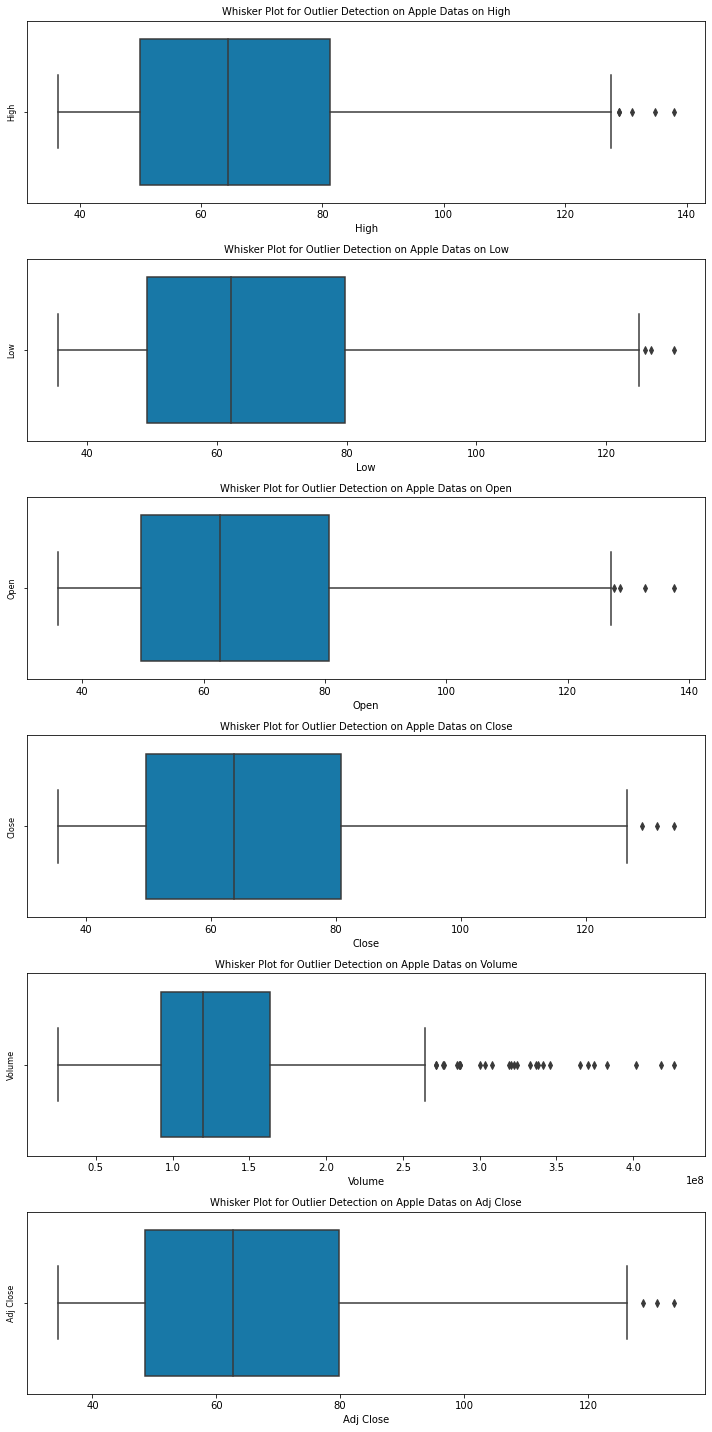

In [207]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(AAPL[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on Apple Datas on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

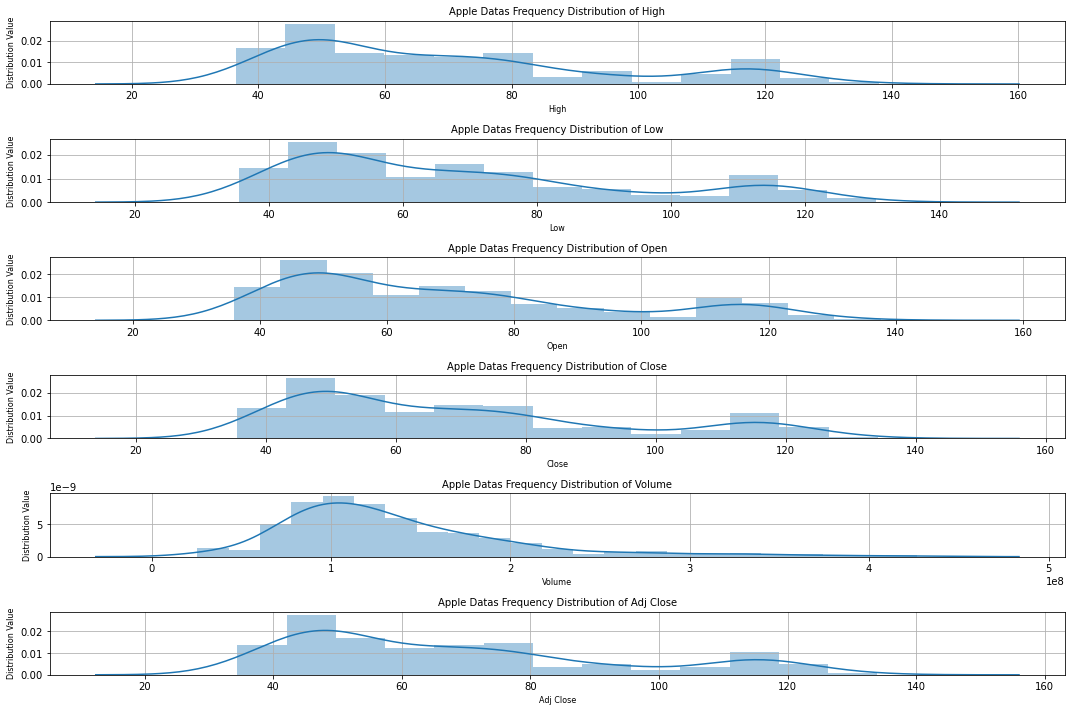

In [208]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(AAPL[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Apple Datas Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

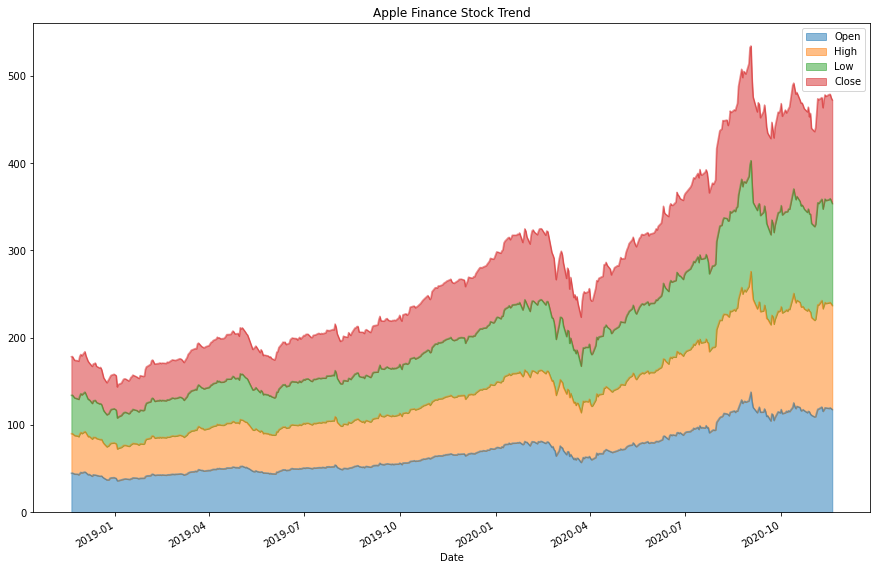

In [209]:
AAPL[["Open","High","Low","Close"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('Apple Finance Stock Trend')
plt.show()

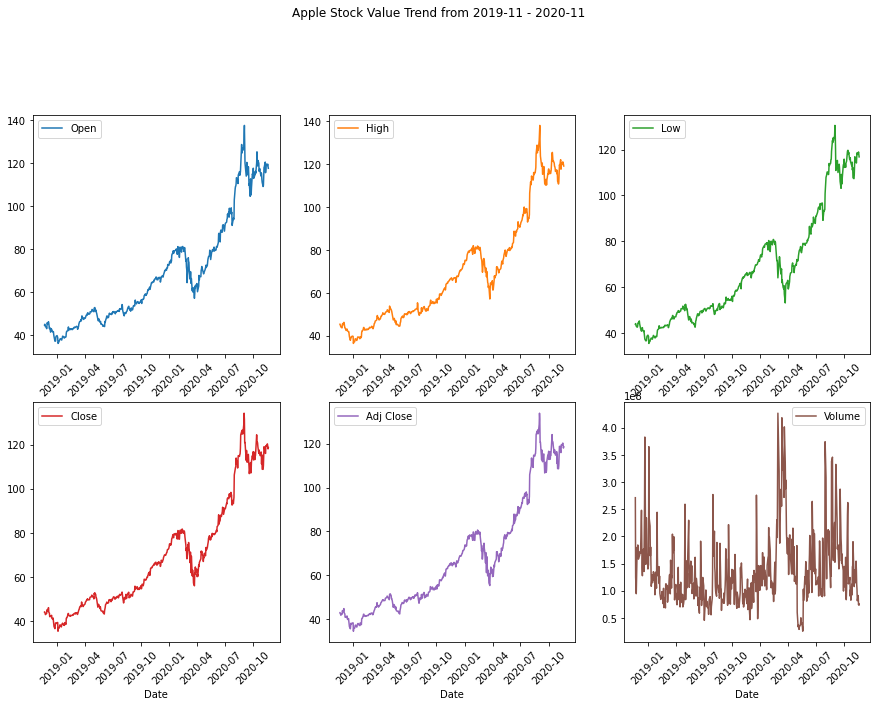

In [210]:
# A glimpse of how the market shares varied over the given time

# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
AAPL.plot(y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Apple Stock Value Trend from 2019-11 - 2020-11", rot = 45);

# 6. Predicting the closing price stock price of APPLE :

In [211]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2019-06-30', end='2020-06-30')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,51.122501,50.162498,50.792500,50.387501,109012000.0,49.215084
2019-07-02,50.782501,50.340000,50.352501,50.682499,67740800.0,49.503204
2019-07-03,51.110001,50.672501,50.820000,51.102501,45448000.0,49.913441
2019-07-05,51.270000,50.724998,50.837502,51.057499,69062000.0,49.869484
2019-07-08,50.349998,49.602501,50.202499,50.005001,101354400.0,48.841476
...,...,...,...,...,...,...
2020-06-24,92.197502,89.629997,91.250000,90.014999,192623200.0,89.698242
2020-06-25,91.250000,89.392502,90.175003,91.209999,137522400.0,90.889038
2020-06-26,91.330002,88.254997,91.102501,88.407501,205256800.0,88.096405


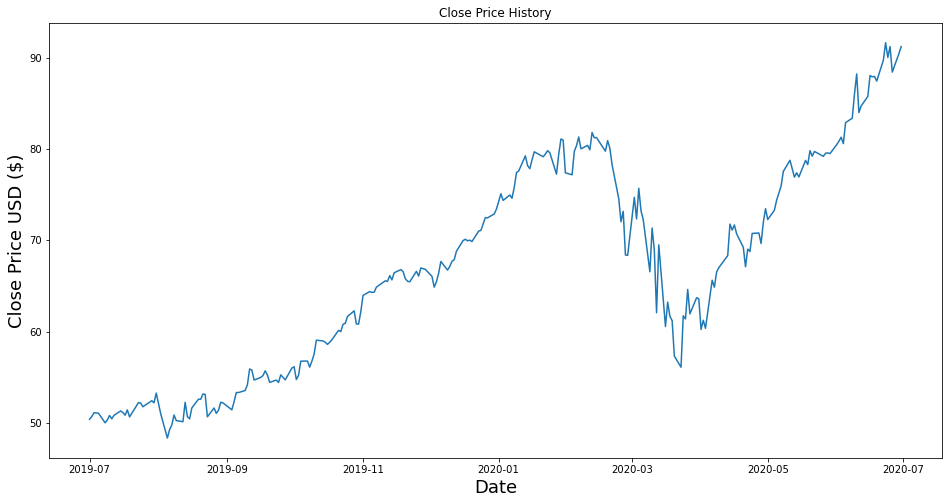

In [212]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [213]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

203

In [214]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[0:5]

array([[0.04740462],
       [0.05421791],
       [0.06391828],
       [0.06287891],
       [0.0385704 ]])

* LSTMs expect our data to be in a specific format, usually a 3D array. We start by creating data in 60 timesteps and converting it into an array using NumPy. Next, we convert the data into a 3D dimension array with X_train samples, 60 timestamps, and one feature at each step.

In [215]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04740462, 0.05421791, 0.06391828, 0.06287891, 0.0385704 ,
       0.0456147 , 0.05710491, 0.04855941, 0.05750913, 0.0685375 ,
       0.06443792, 0.05779785, 0.07113579, 0.05340955, 0.08014322,
       0.08949708, 0.08851551, 0.07898844, 0.08314573, 0.09434723,
       0.08915066, 0.11374789, 0.08712972, 0.06166642, 0.        ,
       0.02113288, 0.03291181, 0.05825969, 0.04417119, 0.04122639,
       0.09024773, 0.05433341, 0.0485017 , 0.07598593, 0.09821589,
       0.0982736 , 0.11143832, 0.11039904, 0.05369827, 0.07592822,
       0.06247478, 0.07038514, 0.09047865, 0.08891974, 0.07136671,
       0.09151802, 0.11513368, 0.11501818, 0.12027254, 0.13488077,
       0.17466366, 0.17177666, 0.1467175 , 0.15335757, 0.15797679,
       0.16992902, 0.15947809, 0.14082799, 0.14654428, 0.14053927])]
[0.15988222213215986]

[array([0.04740462, 0.05421791, 0.06391828, 0.06287891, 0.0385704 ,
       0.0456147 , 0.05710491, 0.04855941, 0.05750913, 0.0685375 ,
       0.06443792, 0.05779785, 0.07

In [216]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


## **Creating LSTM Model**

In [223]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model_lstm.fit(x_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
143/143 [==============================] - 1s 8ms/step - loss: 0.1159
Epoch 2/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0207
Epoch 3/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0106
Epoch 4/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 5/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 6/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0058
Epoch 7/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0069
Epoch 8/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 9/20
143/143 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 10/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 11/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 12/20
143/143 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 13/20
143/143 [====

## **Creating RNN model**

In [280]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
model_rnn = Sequential()

# adding first RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True,input_shape = (x_train.shape[1],1)))
model_rnn.add(Dropout(0.2))
# adding second RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model_rnn.add(Dropout(0.2))
# adding third RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = False))
model_rnn.add(Dropout(0.2))
# adding the output layer
model_rnn.add(Dense(units = 1))
# compiling RNN
model_rnn.compile(optimizer = "adam", loss = "mean_squared_error")
# fitting the RNN
model_rnn.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
143/143 [==============================] - 1s 7ms/step - loss: 0.6652
Epoch 2/100
143/143 [==============================] - 0s 2ms/step - loss: 0.4194
Epoch 3/100
143/143 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 4/100
143/143 [==============================] - 0s 1ms/step - loss: 0.3178
Epoch 5/100
143/143 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 6/100
143/143 [==============================] - 0s 2ms/step - loss: 0.2144
Epoch 7/100
143/143 [==============================] - 0s 1ms/step - loss: 0.2776
Epoch 8/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1974
Epoch 9/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 10/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1380
Epoch 11/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1644
Epoch 12/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1402
Epoch 13/100


In [225]:
# Get the LSTM model predicted price values 
predictions_lstm = model_lstm.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

In [281]:
# Get the RNN models predicted price values 
predictions_rnn = model_rnn.predict(x_test)
predictions_rnn = scaler.inverse_transform(predictions_rnn)

## **Models Scores**

In [227]:
from sklearn import metrics

# Get the root mean squared error (RMSE)
mse_lstm = metrics.mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print("LSTM Model RMSE: ",rmse_lstm)
# Get r2 score
r2_lstm = metrics.r2_score(y_test, predictions_lstm)
print("LSTM Model r2: ",r2_lstm)

LSTM Model RMSE:  1.99850883133561
LSTM Model r2:  0.9100064975893036


In [282]:
# Get the root mean squared error (RMSE)
mse_rnn = metrics.mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)

print("RNN Model RMSE: ",rmse_rnn)
# Get r2 score
r2_rnn = metrics.r2_score(y_test, predictions_rnn)
print("RNN Model r2: ",r2_rnn)

RNN Model RMSE:  2.0615141357385274
RNN Model r2:  0.9042427544901526


## **Plotting Train Data, Validation Data and Predictions RNN Model**

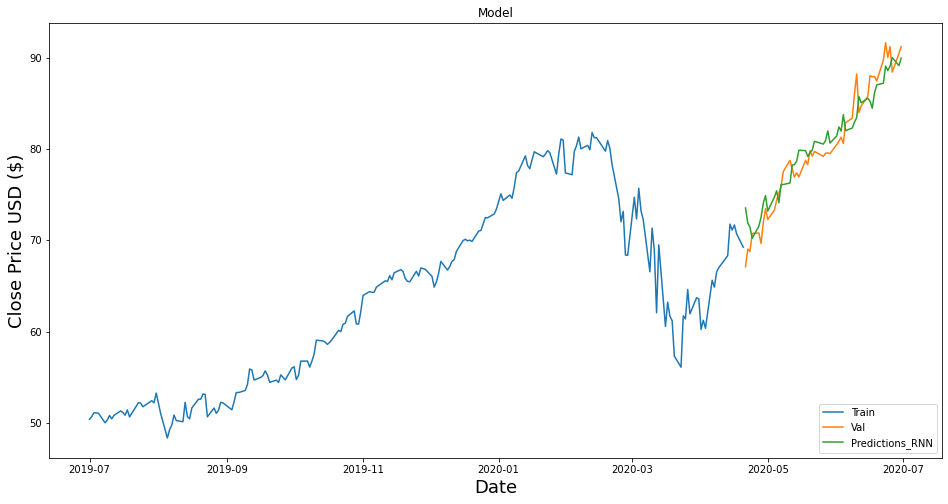

In [283]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_RNN'] = predictions_rnn
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_RNN']])
plt.legend(['Train', 'Val', 'Predictions_RNN'], loc='lower right')
plt.show()

In [285]:
#Show the valid and predicted prices
valid[0:10]

,Close,Predictions_RNN
Date,,
2020-04-21,67.092499,73.527649
2020-04-22,69.025002,71.903358
2020-04-23,68.757500,71.423714
2020-04-24,70.742500,70.201157
2020-04-27,70.792503,71.531967
2020-04-28,69.644997,72.536201
2020-04-29,71.932503,74.054886
2020-04-30,73.449997,74.890991
2020-05-01,72.267502,73.187981


## **Plotting Train Data, Validation Data and Predictions LSTM Model**

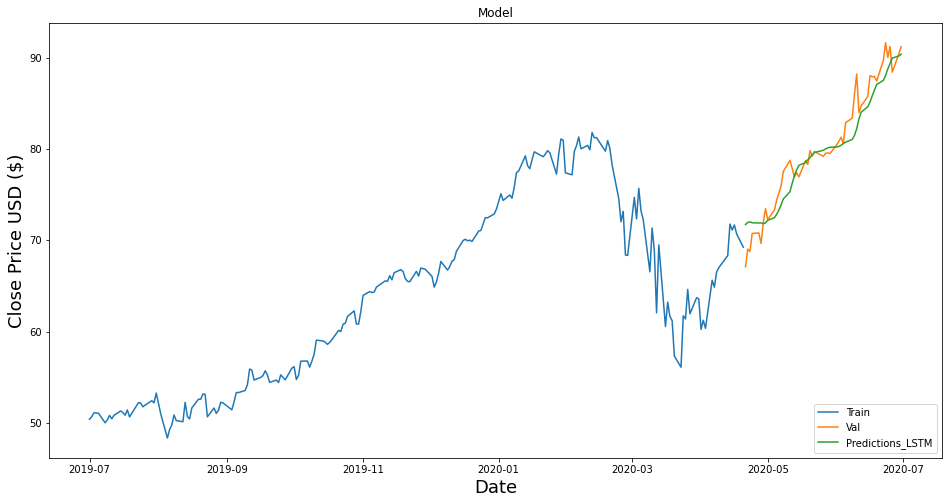

In [286]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_LSTM'] = predictions_lstm
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
plt.legend(['Train', 'Val', 'Predictions_LSTM'], loc='lower right')
plt.show()

In [287]:
#Show the valid and predicted prices
valid[0:10]

,Close,Predictions_LSTM
Date,,
2020-04-21,67.092499,71.713486
2020-04-22,69.025002,71.946442
2020-04-23,68.757500,72.009262
2020-04-24,70.742500,71.910507
2020-04-27,70.792503,71.884132
2020-04-28,69.644997,71.893959
2020-04-29,71.932503,71.815887
2020-04-30,73.449997,71.890953
2020-05-01,72.267502,72.180992


# **Sentiment Analysis of Indian News Headlines**

### Loading Textual Data

In [302]:
ndf = pd.read_csv('india-news-headlines.csv', parse_dates=[0], infer_datetime_format=True,error_bad_lines=False,usecols =["publish_date","headline_text"])
ndf = ndf.rename(columns={"publish_date": "Date"})
ndf.head()

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [303]:
ndf.tail()

,Date,headline_text
3297167,2020-06-30,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...
3297171,2020-06-30,prabhas20 titled as radhe shyam prabhas and po...


In [304]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 50.3+ MB


In [306]:
start_date = pd.to_datetime('2019-06-30')
end_date = pd.to_datetime('2020-06-30')
ndf=ndf.loc[(ndf['Date'] > start_date) & (ndf['Date'] < end_date)]

In [307]:
ndf=ndf.reset_index()

In [308]:
ndf=ndf.drop("index",axis=1)

In [309]:
ndf.head()

,Date,headline_text
0,2019-07-01,Micro review: 'Tom Clancy: Enemy Contact' by M...
1,2019-07-01,karun nair pops the question will marry girlfr...
2,2019-07-01,karun nair pops the question will marry girlfr...
3,2019-07-01,Bengaluru is running dry; and it is a reality
4,2019-07-01,Cosplayers: Spider-Man is a high-schooler; his...


In [310]:
ndf.tail()

,Date,headline_text
181986,2020-06-29,flashback friday when sushant singh rajput wat...
181987,2020-06-29,sanjay leela bhansali wanted to cast sushant s...
181988,2020-06-29,5 years of baahubali the beginning tamannaah b...
181989,2020-06-29,first look of radhe shyam ignites hilarious me...
181990,2020-06-29,tuberculosis vaccine may help in reducing covi...


In [311]:
# Dropping duplicates by grouping the same dates.
ndf['headline_text'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace = True, drop = True)

In [312]:
ndf.head()

,Date,headline_text
0,2019-07-01,Micro review: 'Tom Clancy: Enemy Contact' by M...
1,2019-07-02,Invest in a secure future for your parents Ban...
2,2019-07-03,One actor; six characters: A solo theatre act ...
3,2019-07-04,Party night in Candolim Party night in Candoli...
4,2019-07-05,Telangana CM's school gets swanky building; mo...


### Data Pre-Processing

In [313]:
# uppercase-lowercase conversion
ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [314]:
# punctuation
ndf['headline_text'] = ndf['headline_text'].str.replace('[^\w\s]','')


In [315]:
# numbers
ndf['headline_text'] = ndf['headline_text'].str.replace('\d','')


In [134]:
#!pip install nltk

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434680 sha256=8dfa5fe513a9fbd0282f5dadc884b8a0f81291b9f896d9210c3214f4f98fdec7
  Stored in directory: c:\users\win10\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk


In [316]:
#stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [317]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [318]:
## Deletion of sparse.
delete = pd.Series(' '.join(ndf['headline_text']).split()).value_counts()[-1000:]
ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))


In [319]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [140]:
#!pip install textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)


In [320]:
#lemmatisation
from textblob import Word

ndf['headline_text'] = ndf['headline_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [321]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   headline_text  365 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 5.8+ KB


In [322]:
ndf.head()

,Date,headline_text
0,2019-07-01,micro review tom clancy enemy contact mike mad...
1,2019-07-02,invest secure future parent bank fraud ed sear...
2,2019-07-03,one actor six character solo theatre act set s...
3,2019-07-04,party night candolim party night candolim raja...
4,2019-07-05,telangana cm school get swanky building modern...


In [323]:
ndf.tail()

,Date,headline_text
360,2020-06-25,truck firm look new export market sell b range...
361,2020-06-26,containment zone resident slam high price char...
362,2020-06-27,like wont let toxic relationship food major ra...
363,2020-06-28,atanu ghosh plan rewrite old script make relev...
364,2020-06-29,hot stylish bikini look katrina kaif anna eden...


In [324]:
ndf['headline_text'][0:10]

0    micro review tom clancy enemy contact mike mad...
1    invest secure future parent bank fraud ed sear...
2    one actor six character solo theatre act set s...
3    party night candolim party night candolim raja...
4    telangana cm school get swanky building modern...
5    music review super boy told sweep school floor...
6    world cup point table semifinal lineup league ...
7    there thailand meet eye here guide exploring m...
8    keam counselling keam nd allotment list releas...
9    rrb paramedical exam date city detail released...
Name: headline_text, dtype: object

In [325]:
ndf[ndf['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,Date,headline_text


## Sentiment Analysis

In [326]:
from textblob import TextBlob

In [327]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [328]:
ndf['Subjectivity'] = ndf['headline_text'].apply(getSubjectivity)
ndf['Polarity'] = ndf['headline_text'].apply(getPolarity)
ndf.head()

,Date,headline_text,Subjectivity,Polarity
0,2019-07-01,micro review tom clancy enemy contact mike mad...,0.401671,0.018098
1,2019-07-02,invest secure future parent bank fraud ed sear...,0.384863,0.022444
2,2019-07-03,one actor six character solo theatre act set s...,0.362412,0.010009
3,2019-07-04,party night candolim party night candolim raja...,0.442121,0.069654
4,2019-07-05,telangana cm school get swanky building modern...,0.393211,0.018255


<AxesSubplot:>

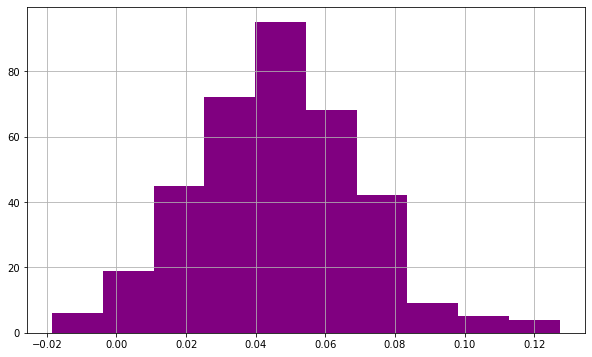

In [329]:
plt.figure(figsize = (10,6))
ndf['Polarity'].hist(color = 'purple')

<AxesSubplot:>

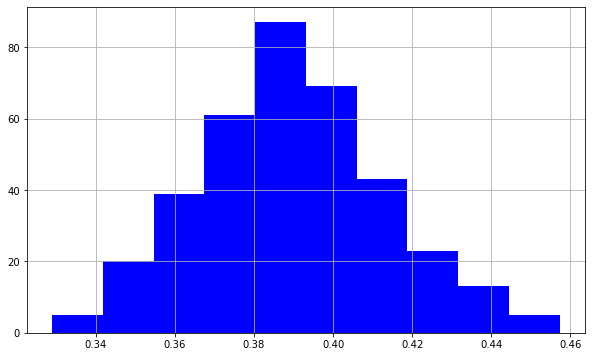

In [330]:
plt.figure(figsize = (10,6))
ndf['Subjectivity'].hist(color = 'blue')

In [331]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [332]:
#Adding sentiment score to ndf by using SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['headline_text']]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['headline_text']]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['headline_text']]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['headline_text']]
ndf[0:5]

,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-07-01,micro review tom clancy enemy contact mike mad...,0.401671,0.018098,-0.9998,0.167,0.741,0.092
1,2019-07-02,invest secure future parent bank fraud ed sear...,0.384863,0.022444,-0.9998,0.161,0.740,0.100
2,2019-07-03,one actor six character solo theatre act set s...,0.362412,0.010009,-0.9999,0.187,0.706,0.107
3,2019-07-04,party night candolim party night candolim raja...,0.442121,0.069654,-0.9998,0.164,0.728,0.108
4,2019-07-05,telangana cm school get swanky building modern...,0.393211,0.018255,-0.9998,0.178,0.712,0.110


In [336]:
df_merge = pd.merge(df, ndf, how='inner', on='Date')
df_merge.head()

,Date,High,Low,Open,Close,Volume,Adj Close,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2019-07-01,51.122501,50.162498,50.792500,50.387501,109012000.0,49.215084,micro review tom clancy enemy contact mike mad...,0.401671,0.018098,-0.9998,0.167,0.741,0.092
1,2019-07-02,50.782501,50.340000,50.352501,50.682499,67740800.0,49.503204,invest secure future parent bank fraud ed sear...,0.384863,0.022444,-0.9998,0.161,0.740,0.100
2,2019-07-03,51.110001,50.672501,50.820000,51.102501,45448000.0,49.913441,one actor six character solo theatre act set s...,0.362412,0.010009,-0.9999,0.187,0.706,0.107
3,2019-07-05,51.270000,50.724998,50.837502,51.057499,69062000.0,49.869484,telangana cm school get swanky building modern...,0.393211,0.018255,-0.9998,0.178,0.712,0.110
4,2019-07-08,50.349998,49.602501,50.202499,50.005001,101354400.0,48.841476,there thailand meet eye here guide exploring m...,0.367742,0.055678,-0.9997,0.165,0.726,0.108


In [337]:
df_merge.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
247,2020-06-23,93.095001,90.567497,91.000000,91.632500,212155600.0,91.310051,delayed period time accept household chore don...,0.344447,0.053438,-0.9998,0.161,0.743,0.096
248,2020-06-24,92.197502,89.629997,91.250000,90.014999,192623200.0,89.698242,never thought voice today vidya rajput never t...,0.374986,0.063773,-0.9998,0.155,0.752,0.093
249,2020-06-25,91.250000,89.392502,90.175003,91.209999,137522400.0,90.889038,truck firm look new export market sell b range...,0.387565,-0.003117,-0.9999,0.185,0.740,0.075
250,2020-06-26,91.330002,88.254997,91.102501,88.407501,205256800.0,88.096405,containment zone resident slam high price char...,0.365355,0.049606,-0.9998,0.168,0.730,0.102
251,2020-06-29,90.542503,87.820000,88.312500,90.445000,130646000.0,90.126732,hot stylish bikini look katrina kaif anna eden...,0.377390,0.053196,-0.9998,0.170,0.731,0.100


# **Hybrid model Analysis**

In [344]:
df_final = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,50.387501,0.401671,0.018098,-0.9998,0.167,0.741,0.092
1,50.682499,0.384863,0.022444,-0.9998,0.161,0.740,0.100
2,51.102501,0.362412,0.010009,-0.9999,0.187,0.706,0.107
3,51.057499,0.393211,0.018255,-0.9998,0.178,0.712,0.110
4,50.005001,0.367742,0.055678,-0.9997,0.165,0.726,0.108
...,...,...,...,...,...,...,...
247,91.632500,0.344447,0.053438,-0.9998,0.161,0.743,0.096
248,90.014999,0.374986,0.063773,-0.9998,0.155,0.752,0.093
249,91.209999,0.387565,-0.003117,-0.9999,0.185,0.740,0.075
250,88.407501,0.365355,0.049606,-0.9998,0.168,0.730,0.102


### Feature Scaling using MinMaxScaler

In [345]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_final))
df_scaled.columns = df_final.columns
df_scaled.index = df_final.index
df_scaled.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.047405,0.566525,0.274352,0.00010,0.484848,0.604396,0.273810
1,0.054218,0.435591,0.306993,0.00010,0.424242,0.593407,0.369048
2,0.063918,0.260691,0.213587,0.00005,0.686869,0.219780,0.452381
3,0.062879,0.500619,0.275526,0.00010,0.595960,0.285714,0.488095
4,0.038570,0.302213,0.556651,0.00015,0.464646,0.439560,0.464286


## Create Hybrid Model

In [346]:
X=df_scaled.drop("Close",axis=1)
y=df_scaled["Close"]

### Train-Test 

In [347]:
# shuffle and split training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [362]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics

### Random Forest

In [372]:
## Using Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Model RMSE: ",rmse_rf)

Random Forest Model RMSE:  0.2426175222769416


### Xgboost

In [448]:
# !pip install xgboost

In [370]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.01, 
                         max_depth = 2, 
                         n_estimators = 1000) 
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)

mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGB Model RMSE: ",rmse_xgb)

XGB Model RMSE:  0.22322001773269526


### Light GBM

In [354]:
# !pip install lightgbm

In [373]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 8, 
                           n_estimators = 50,
                           colsample_bytree = 0.4,
                           num_leaves = 10)
lgbm.fit(X_train, y_train)
y_pred_lgbm=lgbm.predict(X_test)

mse_lgbm = metrics.mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)

print("Light GBM Model RMSE: ",rmse_lgbm)

Light GBM Model RMSE:  0.22963568672560292


### Catboost

In [363]:
# !pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=deb8c789be482ac2a622f6d80e5532f59912340d894c2ba92dae98cee55dfbf2
  Stored in directory: c:\users\win10\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [378]:
from catboost import CatBoostRegressor 
catb = CatBoostRegressor(iterations = 500, 
                               learning_rate = 0.1, 
                               depth = 5)
catb.fit(X_train, y_train)
y_pred_cat=catb.predict(X_test)


0:	learn: 0.2575554	total: 1.2ms	remaining: 599ms
1:	learn: 0.2523893	total: 2.11ms	remaining: 526ms
2:	learn: 0.2489478	total: 2.88ms	remaining: 477ms
3:	learn: 0.2443382	total: 3.72ms	remaining: 461ms
4:	learn: 0.2394524	total: 4.45ms	remaining: 440ms
5:	learn: 0.2361301	total: 5.17ms	remaining: 426ms
6:	learn: 0.2329209	total: 5.89ms	remaining: 415ms
7:	learn: 0.2313387	total: 6.59ms	remaining: 405ms
8:	learn: 0.2286366	total: 7.43ms	remaining: 405ms
9:	learn: 0.2240028	total: 8.14ms	remaining: 399ms
10:	learn: 0.2225032	total: 8.85ms	remaining: 393ms
11:	learn: 0.2200588	total: 9.57ms	remaining: 389ms
12:	learn: 0.2167769	total: 10.4ms	remaining: 389ms
13:	learn: 0.2147843	total: 11.1ms	remaining: 387ms
14:	learn: 0.2125923	total: 11.9ms	remaining: 384ms
15:	learn: 0.2106597	total: 12.6ms	remaining: 381ms
16:	learn: 0.2078234	total: 13.5ms	remaining: 384ms
17:	learn: 0.2065121	total: 14.4ms	remaining: 386ms
18:	learn: 0.2044891	total: 15.2ms	remaining: 386ms
19:	learn: 0.2032470	to

In [379]:
mse_cat = metrics.mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)

print("Catboost Model RMSE: ",rmse_cat)

Catboost Model RMSE:  0.22958536451088343


### AdaBoost

In [376]:
## Using AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)
y_pred_adb=adb.predict(X_test)

mse_adb = metrics.mean_squared_error(y_test, y_pred_adb)
rmse_adb = np.sqrt(mse_adb)

print("AdaBoost Model RMSE: ",rmse_adb)

AdaBoost Model RMSE:  0.23308655573031092


In [ ]:
## Hence, the model fits best for Xgboost regressor